In [185]:
import geopandas as gp 
import pandas as pd
from shapely.geometry import Point
from zipfile import ZipFile

## Hard to count 

In [167]:
htc_data = pd.read_excel('data/hard_to_count/pdb2015tract_2010MRR_2017ACS_NY.xlsx', skiprows=5, dtype={'GEOIDtxt' : 'str'})

In [3]:
tracts = gp.read_file('data/hard_to_count/tl_2018_36_tract.shp')

In [7]:
htc_data[htc_data.Stusps10=='NY'].to_csv('data/hard_to_count_NY.csv', index=False)

In [48]:
htc_data.GEOIDtxt.as

dtype('int64')

In [47]:
pd.merge(tracts,htc_data,left_on='GEOID',right_on='GEOIDtxt')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

## Facilities

In [220]:
with ZipFile('data/facilities_201912.csv.zip') as zf:
    facilities  = pd.read_csv(zf.open('facilities_201912.csv'), dtype={'censtract' :'str'})

In [221]:
types=['DAY CARE','EARLY EDUCATION PROGRAM','AFTERSCHOOL PROGRAMS', 'ELEMENTARY SCHOOL - NON-PUBLIC', 'RESIDENTIAL MENTAL HEALTH',
       'ELEMENTARY SCHOOL - PUBLIC','FOOD PANTRY']

facilities =facilities[facilities.factype.isin(types)]
facilities.shape

(6245, 37)

In [222]:
facility_cols = ['facname', 'addressnum', 'streetname', 'address', 'city', 'zipcode',
       'boro', 'borocode', 'bin', 'bbl', 'commboard', 'nta', 'council',
       'schooldist', 'censtract', 'factype','capacity', 'geometry',
       'uid']

In [223]:
facilities_geo = gp.GeoDataFrame(facilities,geometry = facilities.apply(lambda x: Point(x.longitude,x.latitude),axis=1), crs={'init':'EPSG:4326'})
facilities_geo = gp.GeoDataFrame(facilities_geo[facility_cols])


JOIN THESE WITH CENSUS TRACTS AT BOTTOM TO GET PROPER GEOID

In [224]:
facilities[facility_cols + ["latitude","longitude"]].to_csv('../public/facilities.csv', index=False)

In [225]:
facilities.censtract

1           NaN
2        018100
3           NaN
4           NaN
5           NaN
          ...  
34247    023600
34249    025100
34251    009400
34258    039800
34270       NaN
Name: censtract, Length: 6245, dtype: object

## Mail Strategies

In [12]:
mail_strategy_data = pd.read_excel('data/2020-mail-strategies-by-tract.xlsx')

In [43]:
mail_strategy_data.BCUSTATEFP.value_counts().sort_index()


1     1173
2      119
4     1463
5      686
6     7987
8     1233
9      828
10     214
11     179
12    4174
13    1949
15     295
16     295
17    3116
18    1507
19     823
20     765
21    1095
22    1124
23     351
24    1387
25    1468
26    2759
27    1330
28     659
29    1390
30     260
31     528
32     675
33     294
34    1998
35     467
36    4874
37    2160
38     197
39    2943
40    1029
41     825
42    3209
44     240
45    1087
46     203
47    1488
48    5213
49     578
50     183
51    1879
53    1436
54     463
55    1393
56     124
Name: BCUSTATEFP, dtype: int64

In [35]:
mail_strategy_data.LANGUAGE.value_counts()

0    64378
1     7737
Name: LANGUAGE, dtype: int64

In [44]:
new_york_mail_strategy = mail_strategy_data[mail_strategy_data.BCUSTATEFP==36]

In [45]:
new_york_mail_strategy

,CONTACT_STRATEGY,LANGUAGE,BCUSTATEFP,BCUCOUNTYFP,BCUTRACTCE
42591,1,0,36,1,100
42592,2,0,36,1,200
42593,1,0,36,1,300
42594,1,0,36,1,401
42595,1,0,36,1,403
...,...,...,...,...,...
47460,1,0,36,123,150100
47461,1,0,36,123,150200
47462,1,0,36,123,150300
47463,1,0,36,123,150400


In [60]:
new_york_mail_strategy= (new_york_mail_strategy.assign(state  =new_york_mail_strategy.BCUSTATEFP.apply(lambda x :'{0:0>2}'.format(x)),
                              county =  new_york_mail_strategy.BCUCOUNTYFP.apply(lambda x: '{0:0>3}'.format(x)),
                              tract  = new_york_mail_strategy.BCUTRACTCE.apply(lambda x: '{0:0>6}'.format(x))
                             )
                      .assign(geoid = lambda x: x.state + x.county + x.tract))

new_york_mail_strategy = new_york_mail_strategy.set_index('geoid')


In [47]:
new_york_mail_strategy

,CONTACT_STRATEGY,LANGUAGE,BCUSTATEFP,BCUCOUNTYFP,BCUTRACTCE,state,county,tract,geoid
42591,1,0,36,1,100,36,001,000100,36001000100
42592,2,0,36,1,200,36,001,000200,36001000200
42593,1,0,36,1,300,36,001,000300,36001000300
42594,1,0,36,1,401,36,001,000401,36001000401
42595,1,0,36,1,403,36,001,000403,36001000403
...,...,...,...,...,...,...,...,...,...
47460,1,0,36,123,150100,36,123,150100,36123150100
47461,1,0,36,123,150200,36,123,150200,36123150200
47462,1,0,36,123,150300,36,123,150300,36123150300
47463,1,0,36,123,150400,36,123,150400,36123150400


In [50]:
new_york_mail_strategy.LANGUAGE.value_counts()

0    4202
1     672
Name: LANGUAGE, dtype: int64

## Geojson

In [79]:
htc_data.

11

In [165]:
htc_data[htc_data.GEOIDtxt==36047000501]

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1097,36047000501,36047000501,36,NY,New York,47,Kings County,5.01,85.6,0,...,1440,38,1402,901,36,1366,501,0,0,0


In [159]:
htc_data[htc_data.County_name10=='Kings County']

,GEOID,GEOIDtxt,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
1094,36047000100,36047000100,36,NY,New York,47,Kings County,1.00,84.6,0,...,1843,20,1823,1110,79,1715,690,83,0,0
1095,36047000200,36047000200,36,NY,New York,47,Kings County,2.00,62.7,1,...,231,0,231,118,38,193,89,31,0,0
1096,36047000301,36047000301,36,NY,New York,47,Kings County,3.01,84.3,0,...,1739,10,1729,1231,119,1610,457,44,0,0
1097,36047000501,36047000501,36,NY,New York,47,Kings County,5.01,85.6,0,...,1440,38,1402,901,36,1366,501,0,0,0
1098,36047000502,36047000502,36,NY,New York,47,Kings County,5.02,85.6,0,...,1453,19,1434,960,35,1399,464,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,36047122000,36047122000,36,NY,New York,47,Kings County,1220.00,59.8,1,...,1868,0,1868,635,164,1675,1137,119,29,0
1851,36047123700,36047123700,36,NY,New York,47,Kings County,1237.00,59.4,1,...,612,0,612,312,84,528,271,29,0,0
1852,36047150200,36047150200,36,NY,New York,47,Kings County,1502.00,73.0,1,...,917,5,912,423,31,881,471,27,0,0
1853,36047152200,36047152200,36,NY,New York,47,Kings County,1522.00,73.0,1,...,1003,0,1003,596,62,900,348,73,22,0


In [163]:
census_tracts[census_tracts.boro_name=='Brooklyn']

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,ct_county,CONTACT_STRATEGY,LANGUAGE
geoid,,,,,,,,,,,,,,,
36047000501,BK09,901506.992481,Brooklyn Heights-Cobble Hill,4828.17004215,Brooklyn,4004,000501,3,I,3000501,5.01,"MULTIPOLYGON (((-73.99302 40.69746, -73.99379 ...",047,1,0
36047004100,BK38,1744094.3952,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,5283.85665969,Brooklyn,4004,004100,3,I,3004100,41,"MULTIPOLYGON (((-73.98182 40.68733, -73.98223 ...",047,1,0
36047005800,BK31,2080303.31132,Bay Ridge,6098.16780024,Brooklyn,4013,005800,3,E,3005800,58,"MULTIPOLYGON (((-74.02956 40.61983, -74.02821 ...",047,1,0
36047006000,BK31,1639074.04175,Bay Ridge,5498.33438728,Brooklyn,4013,006000,3,I,3006000,60,"MULTIPOLYGON (((-74.02835 40.62280, -74.02864 ...",047,1,0
36047006700,BK33,1680804.38927,Carroll Gardens-Columbia Street-Red Hook,5236.04791182,Brooklyn,4005,006700,3,I,3006700,67,"MULTIPOLYGON (((-73.99441 40.68545, -73.99458 ...",047,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36047016000,BK31,2785264.01265,Bay Ridge,7935.13018528,Brooklyn,4013,016000,3,E,3016000,160,"MULTIPOLYGON (((-74.02621 40.62149, -74.02536 ...",047,1,0
36047016200,BK31,2621970.92342,Bay Ridge,8493.77995794,Brooklyn,4013,016200,3,I,3016200,162,"MULTIPOLYGON (((-74.02615 40.61626, -74.02634 ...",047,1,0
36047016400,BK31,8407411.10496,Bay Ridge,16774.4313677,Brooklyn,4013,016400,3,I,3016400,164,"MULTIPOLYGON (((-74.02575 40.61606, -74.02607 ...",047,1,0


In [150]:
htc_data.set_index("GEOIDtxt")

,GEOID,State,Stusps10,State_name,County10,County_name10,Tract10,MRR2010,MRR20pctthreshold,UE_flag,...,Internet,DialUpOnly,Broadband_Any,Cellular,CellularOnly,Broadband_CableFiberOpticDSL,Broadband_CableFiberOpticDSLOnly,Satellite,SatelliteOnly,OtherOnly
GEOIDtxt,,,,,,,,,,,,,,,,,,,,,
36001000100,36001000100,36,NY,New York,1,Albany County,1.00,67.9,1,0,...,683,0,683,389,106,574,286,35,3,0
36001000200,36001000200,36,NY,New York,1,Albany County,2.00,60.4,1,0,...,1410,15,1395,790,185,1182,605,7,0,0
36001000300,36001000300,36,NY,New York,1,Albany County,3.00,73.0,1,0,...,1857,19,1838,791,175,1663,994,9,0,0
36001000401,36001000401,36,NY,New York,1,Albany County,4.01,88.1,0,0,...,808,0,808,344,29,779,433,0,0,0
36001000403,36001000403,36,NY,New York,1,Albany County,4.03,76.9,0,0,...,1978,0,1978,923,122,1824,1039,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,36123150100,36,NY,New York,123,Yates County,1501.00,90.2,0,0,...,1710,6,1704,910,162,1385,685,165,56,8
36123150200,36123150200,36,NY,New York,123,Yates County,1502.00,84.6,0,0,...,1227,22,1205,674,82,998,498,118,19,14
36123150300,36123150300,36,NY,New York,123,Yates County,1503.00,90.7,0,0,...,1534,30,1504,808,182,1145,522,218,132,7


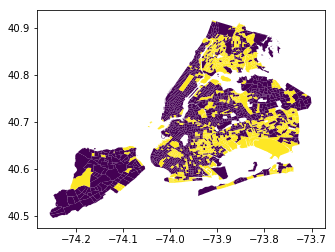

In [177]:
census_tracts = gp.read_file('../public/2010 Census Tracts.geojson')
def strategy_code(x):
    if( x.CONTACT_STRATEGY==1 and x.LANGUAGE == 0):
        return 0
    if(x.CONTACT_STRATEGY==1 and x.LANGUAGE == 1):
        return 1
    if(x.CONTACT_STRATEGY==2 and x.LANGUAGE == 0):
        return 2
    if(x.CONTACT_STRATEGY==2 and x.LANGUAGE == 1):
        return 3
    
    
def boro_to_county(boro_code):
    if boro_code =='1':
        return '061'
    if boro_code =='2':
        return '005'
    if boro_code =='3':
        return '047'
    if boro_code =='4':
        return '081'
    if boro_code =='5':
        return '085'
census_tracts= census_tracts.assign(ct_county = census_tracts.boro_code.apply(lambda x : boro_to_county(x)))
census_tracts = census_tracts.assign(geoid = '36' + census_tracts.ct_county + census_tracts.ct2010 ).set_index('geoid')

census_tracts= census_tracts.join(new_york_mail_strategy[ ['CONTACT_STRATEGY',"LANGUAGE"]],how='inner')
census_tracts = census_tracts.join(htc_data.set_index('GEOIDtxt'), how='inner')
census_tracts= census_tracts.assign(strategy_code = census_tracts.apply(lambda x: strategy_code(x),axis=1))
census_tracts.plot(column="CONTACT_STRATEGY")

In [178]:
census_tracts.to_file('../public/CensusTractsAllVariables.geojson', driver ='GeoJSON')

In [171]:
census_tracts.CONTACT_STRATEGY.value_counts()

1    1446
2     698
Name: CONTACT_STRATEGY, dtype: int64

facilities

In [235]:
gp.sjoin(facilities_geo,census_tracts)[facility_cols+['GEOID']].to_file('../public/facilities.geojson', driver='GeoJSON')

/home/jovyan/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
